In [52]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./realfinal_data.csv')
df = df.dropna()
cleaned_data = df[~df['zipcode'].isin([99999])]


178


,Unnamed: 0,index,zipcode,num_felony,num_violation,num_misdemeanor,most_freq_ofns_desc,most_freq_loc_occur,most_freq_prem_type,most_freq_susp_age_group,...,most_freq_vic_sex,num_total_crimes,median_income,unemployment_rate,num_stopandfrisk,num_police_station,num_restroom,num_bus_stops,num_subway_stations,population
173,173,173,11692.0,389,311,588,HARRASSMENT 2,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,...,F,1288,57687.0,7.8,48,0,0,7,2,18280
174,174,174,11693.0,306,189,495,HARRASSMENT 2,INSIDE,STREET,UNKNOWN,...,F,990,72714.0,9.3,9,1,2,5,2,11098
175,175,175,11694.0,266,210,577,PETIT LARCENY,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,...,M,1053,100190.0,7.3,11,1,1,8,3,17355
176,176,176,11697.0,16,6,16,GRAND LARCENY,INSIDE,RESIDENCE-HOUSE,(null),...,F,38,134563.0,3.4,0,0,0,1,0,3305
178,178,178,NaN,18,6,39,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,F,63,NaN,NaN,0,0,0,0,0,0


In [45]:
df = pd.read_csv('./realfinal_data.csv')
# remove NaN and zipcode with '99999'
df = df.dropna()
df = df[~df['zipcode'].isin([99999])]

# Select relevant features for clustering
features = df[['num_felony', 'num_violation', 'num_misdemeanor', 'num_total_crimes', 'population',
                 'median_income', 'unemployment_rate', 'num_stopandfrisk', 
                 'num_police_station', 'num_restroom', 'num_bus_stops', 'num_subway_stations']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

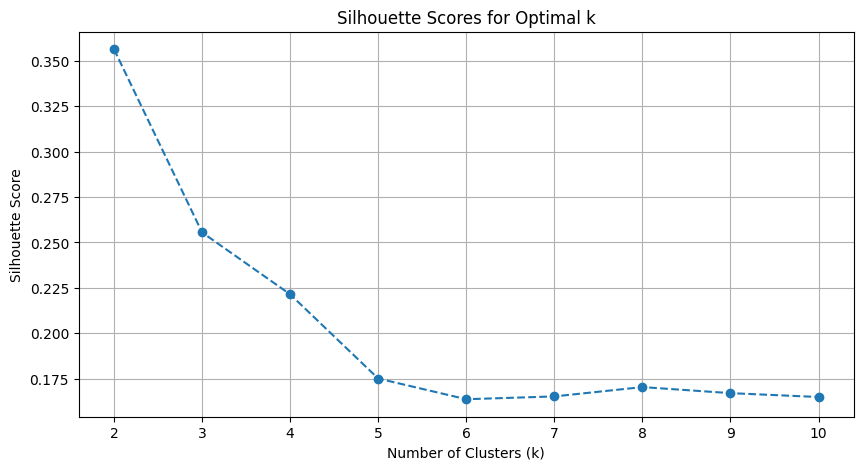

In [49]:
# Elbow Method: Find the optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))

# Plot the Elbow Method
# plt.figure(figsize=(10, 5))
# plt.plot(cluster_range, inertia, marker='o', linestyle='--')
# plt.title('Elbow Method for Optimal k')
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('Inertia')
# plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid()
output_plot_path = "./visuals/silhouette_scores_plot.png"
plt.savefig(output_plot_path)
plt.show()
plt.close()

In [ ]:
# looking at the graph, we can tell that optimal k is 2.
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['crime_severity'] = kmeans.fit_predict(features_scaled)

# Map cluster labels to severity levels: 1 (least severe), 2, 3 (most severe)
severity_mapping = {np.argmin(kmeans.cluster_centers_.sum(axis=1)): 1, 
                    np.argmax(kmeans.cluster_centers_.sum(axis=1)): 3}
severity_mapping.update({i: 2 for i in range(optimal_k) if i not in severity_mapping})
df['crime_severity'] = df['crime_severity'].map(severity_mapping)

# Save the results to a new CSV file
df.to_csv('final_data_with_crime_severity.csv', index=False)

In [51]:
df.head()

,Unnamed: 0,index,zipcode,num_felony,num_violation,num_misdemeanor,most_freq_ofns_desc,most_freq_loc_occur,most_freq_prem_type,most_freq_susp_age_group,...,num_total_crimes,median_income,unemployment_rate,num_stopandfrisk,num_police_station,num_restroom,num_bus_stops,num_subway_stations,population,crime_severity
0,0,0,10001.0,2918,734,3677,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,7329,106509.0,4.3,92,1,8,16,7,24448,3
1,1,1,10002.0,2278,1024,4381,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,7683,43362.0,7.6,109,1,16,33,5,67647,3
2,2,2,10003.0,1865,453,3066,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,5384,152863.0,4.7,82,2,5,13,7,50402,3
3,3,3,10004.0,143,70,229,PETIT LARCENY,INSIDE,STREET,UNKNOWN,...,442,232543.0,0.4,7,1,3,1,3,3739,1
4,4,4,10005.0,219,76,963,PETIT LARCENY,INSIDE,CHAIN STORE,UNKNOWN,...,1258,189886.0,3.4,7,0,0,2,2,7877,1


In [15]:
df2 = pd.read_csv('./final_data.csv')
df2 = df.dropna()

# Select relevant features for clustering
features2 = df2[['num_felony', 'num_violation', 'num_misdemeanor', 'num_total_crimes']]

# Standardize the features
scaler = StandardScaler()
features_scaled2 = scaler.fit_transform(features2)

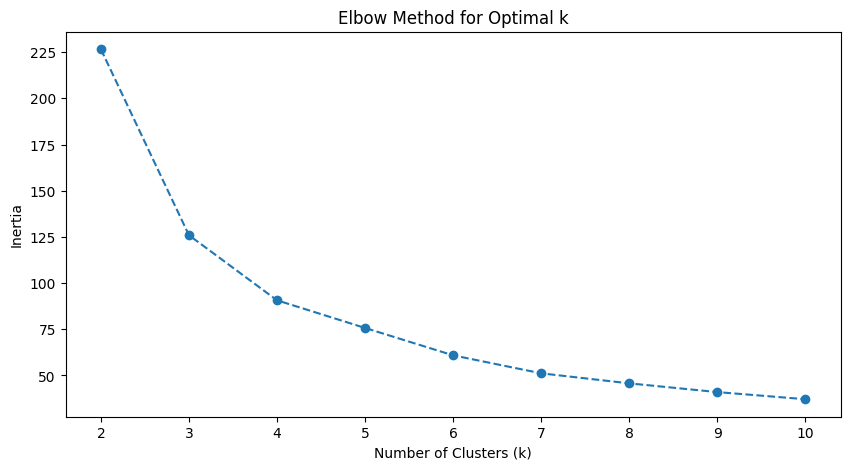

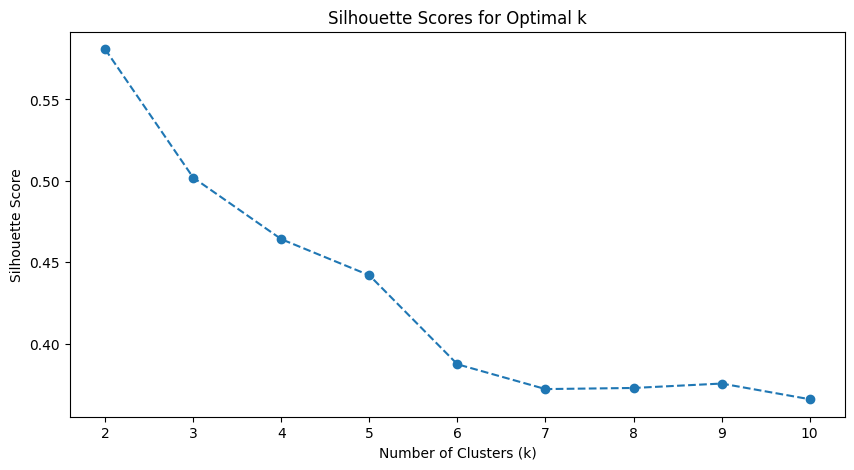

In [16]:
# Elbow Method: Find the optimal number of clusters
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Test cluster sizes from 2 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled2)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled2, kmeans.labels_))

# Plot the Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [20]:
# Choose the optimal k (e.g., k=3 from observation)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df2['crime_severity'] = kmeans.fit_predict(features_scaled)

# Map cluster labels to severity levels: 1 (least severe), 2, 3 (most severe)
import numpy as np
severity_mapping = {np.argmin(kmeans.cluster_centers_.sum(axis=1)): 1, 
                    np.argmax(kmeans.cluster_centers_.sum(axis=1)): 3}
severity_mapping.update({i: 2 for i in range(optimal_k) if i not in severity_mapping})
df2['crime_severity'] = df2['crime_severity'].map(severity_mapping)

# Save the results to a new CSV file
df2.to_csv('final_data_with_crime_severity.csv', index=False)

In [22]:
df2.head()
df2.tail()

,Unnamed: 0,index,zipcode,num_felony,num_violation,num_misdemeanor,most_freq_ofns_desc,most_freq_loc_occur,most_freq_prem_type,most_freq_susp_age_group,...,most_freq_vic_age_group,most_freq_vic_race,most_freq_vic_sex,num_total_crimes,median_income,unemployment_rate,num_stopandfrisk,num_police_station,num_restroom,crime_severity
172,172,172,11691.0,1108,896,1703,HARRASSMENT 2,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,...,25-44,BLACK,F,3707,59153.0,9.5,66,0,0,2
173,173,173,11692.0,389,311,588,HARRASSMENT 2,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,...,25-44,BLACK,F,1288,57687.0,7.8,48,0,0,1
174,174,174,11693.0,306,189,495,HARRASSMENT 2,INSIDE,STREET,UNKNOWN,...,25-44,BLACK,F,990,72714.0,9.3,9,1,2,1
175,175,175,11694.0,266,210,577,PETIT LARCENY,INSIDE,RESIDENCE - APT. HOUSE,UNKNOWN,...,UNKNOWN,WHITE,M,1053,100190.0,7.3,11,1,1,1
176,176,176,11697.0,16,6,16,GRAND LARCENY,INSIDE,RESIDENCE-HOUSE,(null),...,45-64,WHITE,F,38,134563.0,3.4,0,0,0,1


In [23]:
# Define the list of zip codes to ensure presence
zipcodes_to_check = [
    11201, 11203, 11204, 11205, 11206, 11207, 11208, 11209, 11210, 11211, 11212, 11213, 11214, 11215,
    11216, 11217, 11218, 11219, 11220, 11221, 11222, 11223, 11224, 11225, 11226, 11228, 11229, 11230,
    11231, 11232, 11233, 11234, 11235, 11236, 11237, 11238, 11239, 11241, 11243, 11249, 10001, 10002,
    10003, 10004, 10005, 10006, 10007, 10009, 10010, 10011, 10012, 10013, 10014, 10016, 10017, 10018,
    10019, 10021, 10022, 10023, 10024, 10025, 10026, 10027, 10028, 10029, 10030, 10031, 10032, 10033,
    10034, 10035, 10036, 10037, 10038, 10039, 10040, 10044, 10069, 10103, 10119, 10128, 10162, 10165,
    10170, 10173, 10199, 10279, 10280, 10282, 11004, 11101, 11102, 11103, 11104, 11105, 11106, 11109,
    11351, 11354, 11355, 11356, 11357, 11358, 11359, 11360, 11361, 11362, 11363, 11364, 11365, 11366,
    11367, 11368, 11369, 11370, 11372, 11373, 11374, 11375, 11377, 11378, 11379, 11385, 11411, 11412,
    11413, 11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421, 11422, 11423, 11426, 11427, 11428,
    11429, 11432, 11433, 11434, 11435, 11436, 11691, 11692, 11693, 11694, 11697, 10451, 10452, 10453,
    10454, 10455, 10456, 10457, 10458, 10459, 10460, 10461, 10462, 10463, 10464, 10465, 10466, 10467,
    10468, 10469, 10470, 10471, 10472, 10473, 10474, 10475, 10501, 10502, 10503, 10504, 10505, 10506,
    10507, 10510, 10511, 10514, 10517, 10518, 10519, 10520, 10522, 10523, 10526, 10527, 10528, 10530,
    10532, 10533, 10535, 10536, 10537, 10538, 10540, 10543, 10545, 10546, 10547, 10548, 10549, 10550,
    10552, 10553, 10560, 10562, 10566, 10567, 10570, 10573, 10576, 10577, 10578, 10580, 10583, 10588,
    10589, 10590, 10591, 10594, 10595, 10596, 10597, 10598, 10601, 10603, 10604, 10605, 10606, 10607,
    10701, 10703, 10704, 10705, 10706, 10707, 10708, 10709, 10710, 10801, 10803, 10804, 10805
]

zipcodes_to_check_df = pd.DataFrame(zipcodes_to_check, columns=['zipcode'])
zipcodes_file_path = './NYCzipcodes.csv'
zipcodes_to_check_df.to_csv(zipcodes_file_path, index=False)

# Identify missing zip codes
existing_zipcodes = df2['zipcode'].unique()
missing_zipcodes = [zipcode for zipcode in zipcodes_to_check if zipcode not in existing_zipcodes]

# Create a DataFrame for missing zip codes with all features set to 0
columns = df2.columns
missing_data = pd.DataFrame([{col: 0 for col in columns} for _ in missing_zipcodes])
missing_data['zipcode'] = missing_zipcodes

# Append missing data to the original dataset
data_complete = pd.concat([df2, missing_data], ignore_index=True)

# Save the updated dataset
output_path = './finalfinaldataset.csv'
data_complete.to_csv(output_path, index=False)

output_path


'./finalfinaldataset.csv'

In [29]:
data_complete.shape[0]

265

In [30]:
df2.shape[0]

177